In [3]:
import requests

API_KEY = ''


def get_block_details(block_number):
    url = f'https://api.etherscan.io/api'
    params = {
        'module': 'block',
        'action': 'getblockreward',
        'blockno': block_number,
        'apikey': API_KEY
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

def get_transaction_details(tx_hash):
    url = f'https://api.etherscan.io/api'
    params = {
        'module': 'transaction',
        'action': 'gettxinfo',
        'txhash': tx_hash,
        'apikey': API_KEY
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Example usage
block_number = '20603846'
block_details = get_block_details(block_number)
print('Block Details:')
block_details

# tx_hash = '0x1234567890abcdef...'
# # transaction_details = get_transaction_details(tx_hash)
# # print('Transaction Details:', transaction_details)


Block Details:


{'status': '1',
 'message': 'OK',
 'result': {'blockNumber': '20603846',
  'timeStamp': '1724567627',
  'blockMiner': '0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5',
  'blockReward': '12877764322586930',
  'uncles': [],
  'uncleInclusionReward': '0'}}

In [12]:
def get_address_transactions(address):
    url = f'https://api.etherscan.io/api'
    params = {
        'module': 'account',
        'action': 'txlist',
        'address': address,
        'startblock': 0,
        'endblock': 10000000,
        'page': 1,
        'sort': 'asc',
        'apikey': API_KEY
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

address = '0x742d35Cc6634C0532925a3b844Bc454e4438f44e'  # Replace with a specific address
address_transactions = get_address_transactions(address)

In [13]:
import pandas as pd

df = pd.DataFrame(address_transactions['result'])
df.head()

,blockNumber,blockHash,timeStamp,hash,nonce,transactionIndex,from,to,value,gas,gasPrice,input,methodId,functionName,contractAddress,cumulativeGasUsed,txreceipt_status,gasUsed,confirmations,isError
0,5521276,0x11e7902720160610b6cced1a6891e9a202c38ab6215c...,1524929297,0x97fe020783c49a6841d6fa167d279625b04cf9785147...,882,118,0xf4b51b14b9ee30dc37ec970b50a486f37686e2a8,0x742d35cc6634c0532925a3b844bc454e4438f44e,1000000000000000000,21000,99000000000,0x,0x,,,5429686,1,21000,15082637,0
1,5521337,0xfd742d7519c11591da9a0a096679cda1d0391faf878a...,1524930183,0x00d489bc59cddf3852f69e52a4f3995ba09debbc9070...,0,0,0x742d35cc6634c0532925a3b844bc454e4438f44e,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,0,152094,99000000000,0xa9059cbb000000000000000000000000f4b51b14b9ee...,0xa9059cbb,"transfer(address _to, uint256 _value)",,52094,1,52094,15082576,0
2,5521387,0x39d4ee7952c5f4ee4b7046d1c96ea75882a237d6bf96...,1524931069,0x1cdd1a32e3df7131ca1e330e368badd45d0aca3a9178...,1,2,0x742d35cc6634c0532925a3b844bc454e4438f44e,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,500000000000000000,21000,99000000000,0x,0x,,,94139,1,21000,15082526,0
3,5531720,0x2d2caf9c13971ea62507f9953ef8cc7fbe8d9f89cfa6...,1525085541,0xc92022956983c6c9cb9ee61871fbc2db2766f3f15430...,2,10,0x742d35cc6634c0532925a3b844bc454e4438f44e,0xf230b790e05390fc8295f4d3f60332c93bed42e2,0,121000,99000000000,0xa9059cbb000000000000000000000000876eabf441b2...,0xa9059cbb,"transfer(address _to, uint256 _value)",,247538,1,37091,15072193,0
4,5534509,0x45d4116f999f74d0787b084395771ed288884fd04d69...,1525127157,0xd83fcf11a091a1be95d4e4bab53315d2ff5c16b19073...,3,0,0x742d35cc6634c0532925a3b844bc454e4438f44e,0xcbeaec699431857fdb4d37addbbdc20e132d4903,0,188406,99000000000,0xa9059cbb000000000000000000000000876eabf441b2...,0xa9059cbb,"transfer(address _to, uint256 _value)",,88406,1,88406,15069404,0


In [14]:
df.columns

Index(['blockNumber', 'blockHash', 'timeStamp', 'hash', 'nonce',
       'transactionIndex', 'from', 'to', 'value', 'gas', 'gasPrice', 'input',
       'methodId', 'functionName', 'contractAddress', 'cumulativeGasUsed',
       'txreceipt_status', 'gasUsed', 'confirmations', 'isError'],
      dtype='object')

In [18]:
numeric_columns = ['blockNumber', 'timeStamp', 'gas', 'gasPrice', 'gasUsed', 'nonce', 'value', 'confirmations', 'cumulativeGasUsed']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [19]:
df.describe()

,blockNumber,timeStamp,nonce,value,gas,gasPrice,cumulativeGasUsed,gasUsed,confirmations
count,7.396000e+03,7.396000e+03,7396.000000,7.396000e+03,7396.000000,7.396000e+03,7.396000e+03,7396.000000,7.396000e+03
mean,7.617961e+06,1.555335e+09,546470.324635,2.220738e+21,92346.162115,2.227350e+10,2.353579e+06,22861.731612,1.298595e+07
std,1.344749e+06,1.911594e+07,188007.834250,1.924706e+22,29570.997404,2.117777e+10,2.063728e+06,10614.955895,1.344749e+06
min,5.521276e+06,1.524929e+09,0.000000,0.000000e+00,21000.000000,1.000000e+09,2.100000e+04,21000.000000,1.062451e+07
25%,6.371380e+06,1.537517e+09,485021.250000,1.651619e+20,90000.000000,1.500000e+10,7.875290e+05,21000.000000,1.147759e+07
50%,7.335853e+06,1.552146e+09,569215.000000,3.433738e+20,90000.000000,1.500000e+10,1.719492e+06,21004.000000,1.326806e+07
75%,9.126327e+06,1.576685e+09,696665.750000,8.851660e+20,90000.000000,2.000000e+10,3.358416e+06,21004.000000,1.423253e+07
max,9.979406e+06,1.588324e+09,761434.000000,9.000000e+23,521000.000000,2.813000e+11,9.951831e+06,321000.000000,1.508264e+07


In [21]:
df['datetime'] = pd.to_datetime(df['timeStamp'], unit='s')
df['datetime'].head()

,datetime
0,2018-04-28 15:28:17
1,2018-04-28 15:43:03
2,2018-04-28 15:57:49
3,2018-04-30 10:52:21
4,2018-04-30 22:25:57


In [31]:
import plotly.express as px

fig = px.line(df, x='datetime', y="gasUsed", title='Gas Used Over Time')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [30]:
gas_per_month = df.groupby(pd.Grouper(key='datetime', freq='M'))['gas'].sum()
gas_per_month = gas_per_month.reset_index()
fig = px.line(gas_per_month, x='datetime', y="gas", title='Gas over time')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<ipython-input-29-4bb0ceddf2a4>:9: FutureWarning:

The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.



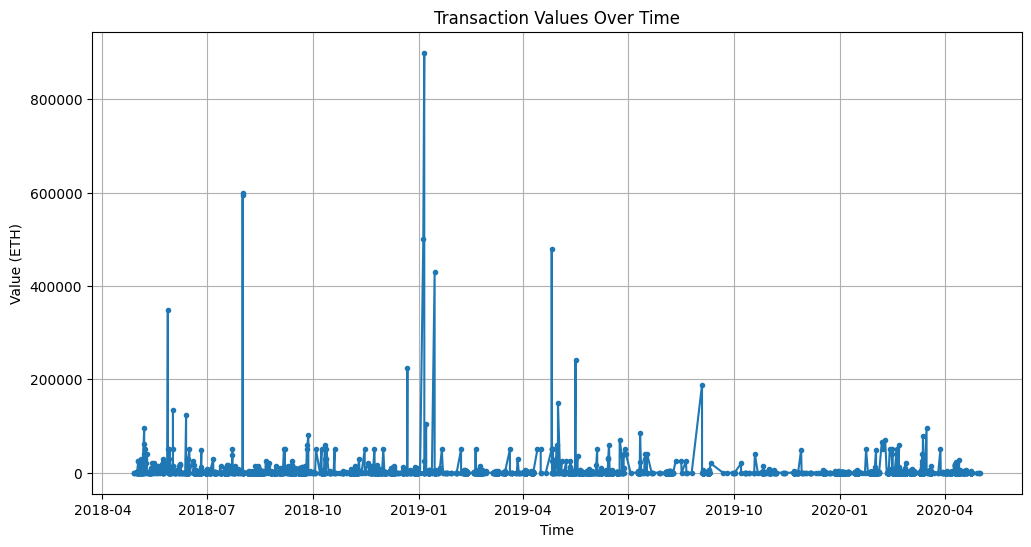

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_transactions(transactions):
    df = pd.DataFrame(transactions['result'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce') / 1e18  # Convert Wei to ETH

    # Example: Plotting transaction values over time
    df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')
    df.set_index('timeStamp', inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['value'], marker='o', linestyle='-', markersize=3)
    plt.title('Transaction Values Over Time')
    plt.xlabel('Time')
    plt.ylabel('Value (ETH)')
    plt.grid(True)
    plt.show()

transactions_data = get_address_transactions(address)
analyze_transactions(transactions_data)
